# Dropsinator

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
from matplotlib.gridspec import GridSpec
from lmfit.models import GaussianModel
from scipy.signal import find_peaks

import sys
sys.path.append('../Library')

import drop_detection_tools as ddt


plot_dir = '../../../Report/Plots/'
plot_dir.rstrip('/')


from tqdm import tqdm
%matplotlib inline

In [2]:
FontSize = 18
plt.rc('axes',   titlesize = FontSize) # fontsize of the axes title
plt.rc('axes',   labelsize = FontSize) # fontsize of the x and y labels
plt.rc('xtick',  labelsize = FontSize) # fontsize of the tick labels
plt.rc('ytick',  labelsize = FontSize) # fontsize of the tick labels
plt.rc('legend', fontsize  = FontSize) # legend fontsize
plt.rc('figure', titlesize = FontSize) # fontsize of the figure title

matplotlib.rcParams.update({
    'font.family': 'serif',
    'font.size' :  18,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

## Data acquisition

../Library\drop_detection_tools.py:54: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  fig.legend(loc='best')


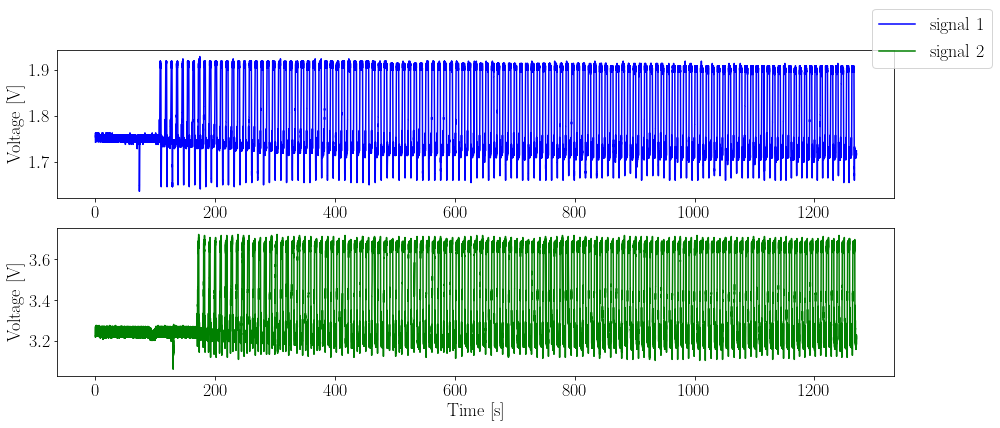

In [3]:
#************************************
folder   = '../../../T-data/2-12/'
filename = 'B-ol2-aq2-pause10.csv'
name     = '2-12_B-ol15-aq15'
#************************************

raw = True 
sig1, sig2, t = ddt.read_LV(folder, filename)

## Resample data

<ipython-input-4-7c2e9819dbc5>:22: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  fig.legend(loc='best')


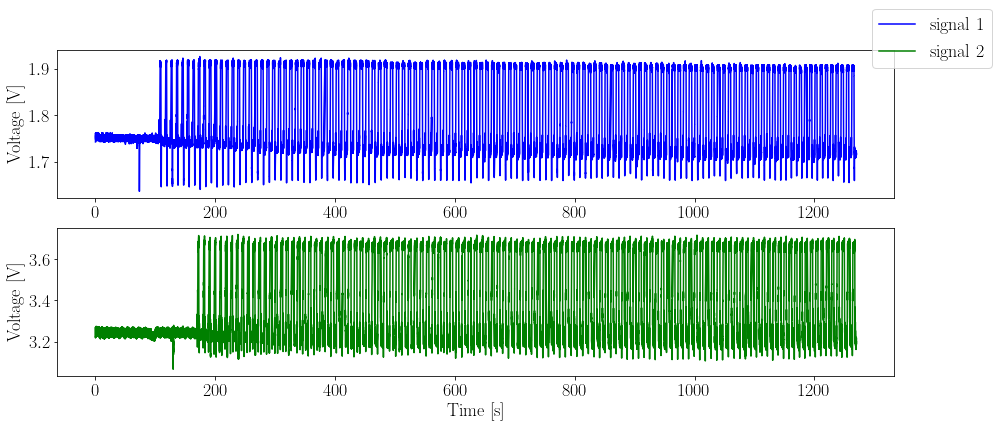

In [4]:
#******************************
dt = 0.01  # sampling time [s]
#******************************

# Resampling of the two signals
if raw:
    sig1, new_t = ddt.resample(sig1, t, dt=dt)
    sig2, _     = ddt.resample(sig2, t, dt=dt)
    t           = new_t
    raw         = False 
else:
    print('data already resampled')

    
# Signals plots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,6))
axs[0].plot(t, sig1, color='blue', label= "signal 1")
axs[0].set_ylabel('Voltage [V]')
axs[1].plot(t, sig2, color='green', label= "signal 2")
axs[1].set_ylabel('Voltage [V]')
axs[1].set_xlabel('Time [s]')
fig.legend(loc='best')

## Fourier transform


In [5]:
min_freq  = 1       # lower cut-off frequency
max_freq  = 20000   # higher cut-off frequency

### Signal 1 

E:\Programmi\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
E:\Programmi\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
../Library\drop_detection_tools.py:249: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  legend = fig.legend(['original signal','cropped signal'], loc='best')


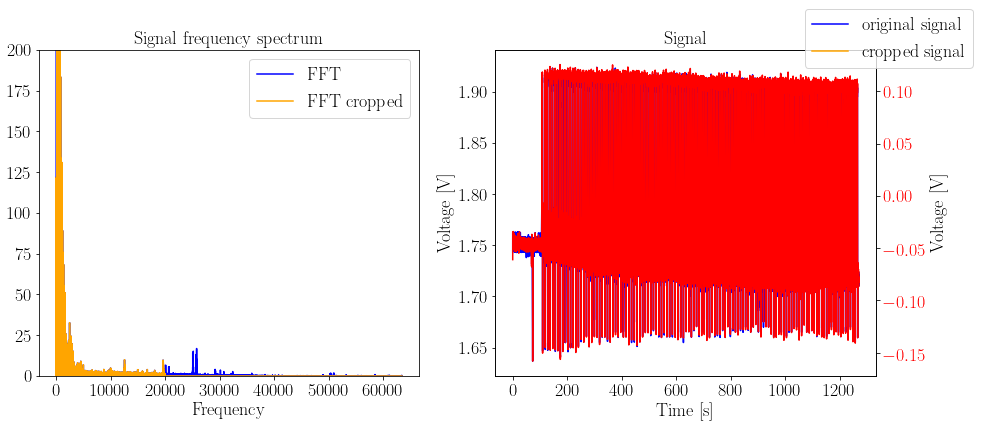

In [6]:
sig1_high = ddt.FFT_cropping(sig1, t, min_freq, max_freq)

### Signal 2 

E:\Programmi\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
E:\Programmi\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
../Library\drop_detection_tools.py:249: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  legend = fig.legend(['original signal','cropped signal'], loc='best')


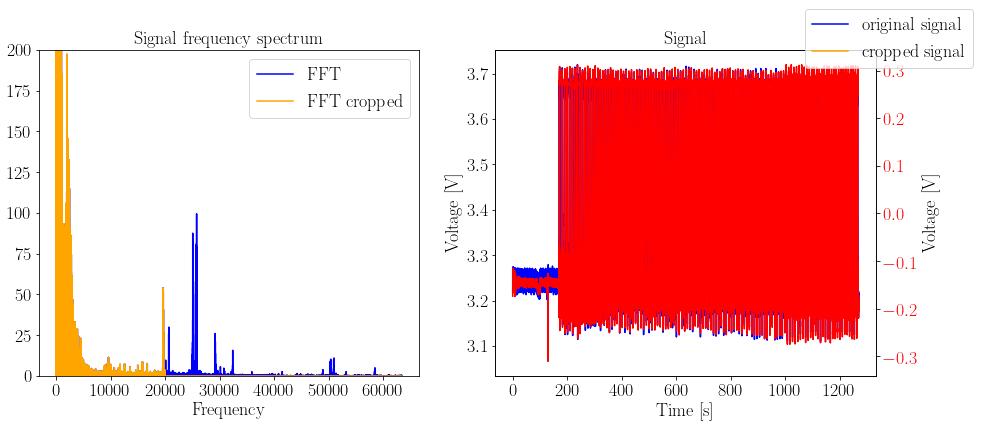

In [7]:
sig2_high = ddt.FFT_cropping(sig2, t, min_freq, max_freq)

## Signal Rectify

### Signal 1 

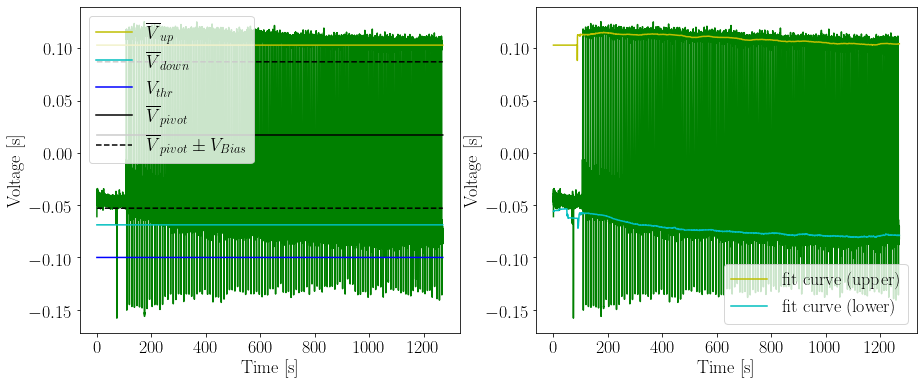

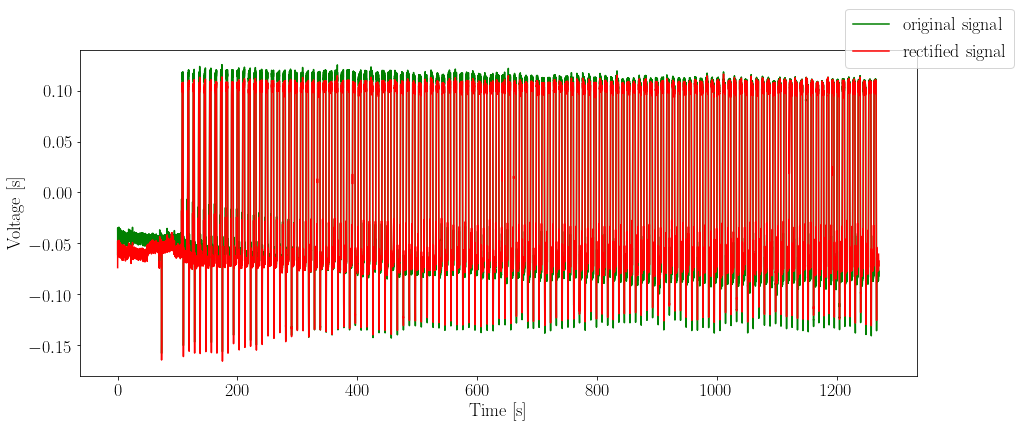

In [8]:
%matplotlib inline

fig, sig1_r = ddt.rectify_new(sig1_high, xrange=20, xmin=None, xmax=None, xdata=t, ignore_bias=0.07, manual_thr=-0.1)

### Signal 2

In [9]:
%matplotlib inline

fig, sig2_r = ddt.rectify_new(sig2_high, xrange=20, xmin=None, xmax=None, xdata=t, ignore_bias=0.07, manual_thr=-0.1)

## Thresholds computing

### Signal 1

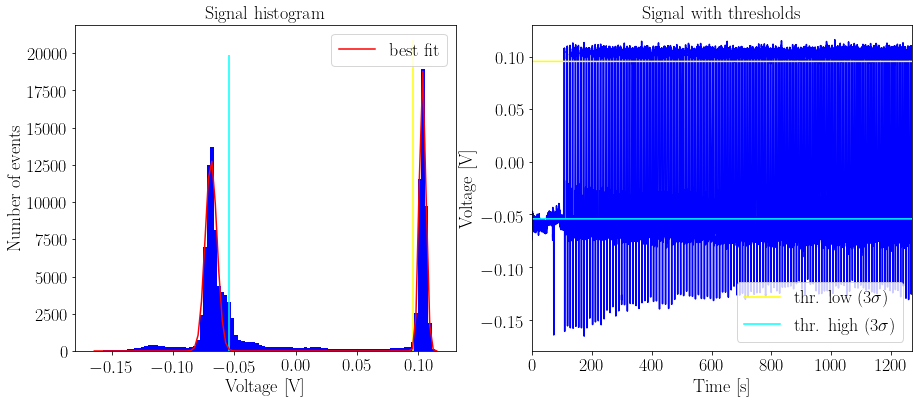

In [10]:
thr_low_1, thr_high_1 = ddt.thr_searcher(sig1_r, 100, high_sigmas=3, low_sigmas=3, Xdata=t,
                                         color='blue', xlabel='Time [s]', ylabel='Voltage [V]')

### Signal 2

In [11]:
thr_low_2, thr_high_2 = ddt.thr_searcher(sig2_r, 50, low_sigmas=3, high_sigmas=3, Xdata=t,
                                         color='green', xlabel='Time [s]', ylabel='Voltage [V]')

NameError: name 'sig2_r' is not defined

## Drops detection

### Signal 1

123 123
123 123


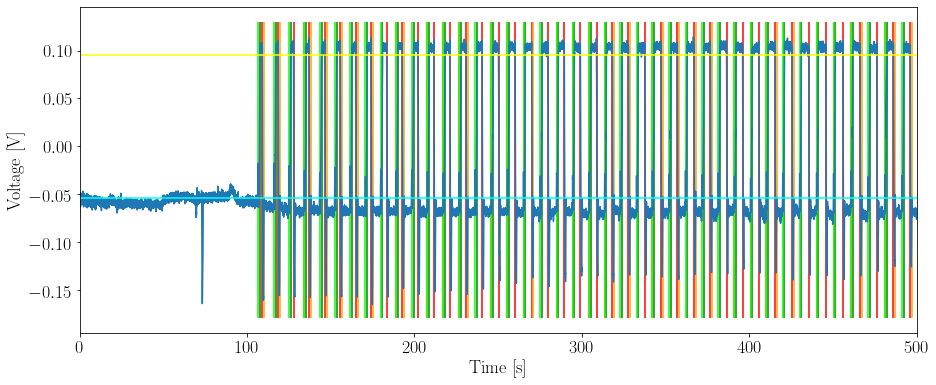

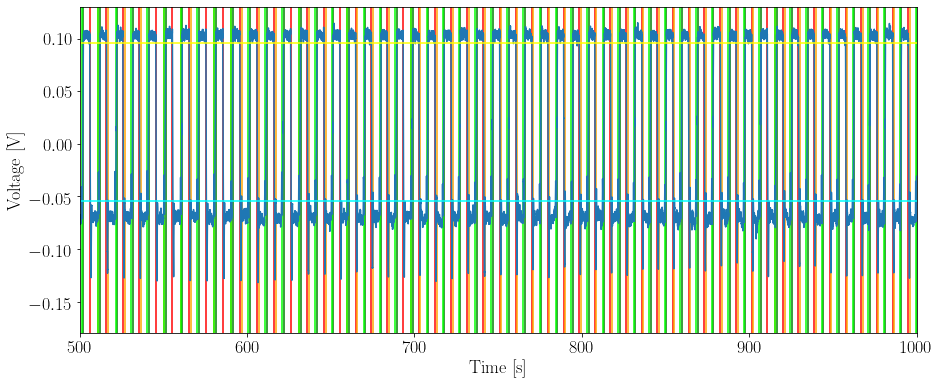

In [73]:
#****************************************
xrange = 500 # single plot x range [s]
#****************************************

%matplotlib inline
returns = ddt.drop_det_new(t, sig1_r, thr_low_1, thr_high_1, backward_skip=1, forward_skip=1, return_indexes=True,
                       xrange=xrange, plot_switch=True, xlabel="Time [s]", ylabel="Voltage [V]")

narrow_start_1, narrow_end_1, wide_start_1, wide_end_1 = returns
#function modified to give output arrays in index form, not in seconds.

### Signal 2

In [ ]:
#****************************************
xrange = 500 # single plot x range [s]
#****************************************

%matplotlib notebook
returns = ddt.drop_det_new(t, sig1_r, thr_low_1, thr_high_1, backward_skip=1, forward_skip=1, return_indexes=True,
                       xrange=xrange, plot_switch=True)

narrow_start_1, narrow_end_1, wide_start_1, wide_end_1 = returns
#function modified to give output arrays in index form, not in seconds.

In [ ]:
# spannometric estimation of the time interval between the drops, knowing the pumps fluxes and capillary size

#********************************************************
radius  = 0.3  # capillary radius [mm]
sep     = 50   # spearation between the two sensors [mm]
flux_ol = 5    # oil flux   [uL/min] = [mm3/min]
flux_aq = 5    # water flux [uL/min] = [mm3/min]
#********************************************************

A  = np.pi*0.25*radius**2       # capillary area [mm2]
v  = (flux_ol + flux_aq)/A/60   # drops speed [mm/s]
dt = sep/v                      # time interval between two following drops [s]

print('v  = ', v,'\t[mm/s] \ndt = ', dt, '\t[s]')

## Delay and everything that goes with it

In [ ]:
#this function calculates delay between sig1 and sig2 by spectra smoothing (delay_gauss) 
#and by simple spectra subtraction (delay_spectra)
    
def delay(sigma, delta, delta_delay, step_delay, start_time, stop_time, step_time):    
    
    
    # Gaussian formula ---------------------------------------

    q = np.sqrt(2*np.pi)
    def gaus(x, mu, sigma):
        return np.exp(-(x - mu)**2/(2*sigma**2))/(sigma*q)

    
    # Gaussian smoothing functions ---------------------------

    # Signal 1
    @np.vectorize
    def sig1_smooth(t, sigma, delta):
        s = 0.
        for t_s in drop_end_1:
            if (t - t_s)**2 < (delta*sigma)**2:
                s += gaus(t,t_s,sigma)
            if t_s - t > (delta+1)*sigma:
                break
        return s
    
    # Signal 2
    @np.vectorize
    def sig2_smooth(t, sigma, delta):
        s = 0.
        for t_s in drop_end_2:
            if (t - t_s)**2 < (delta*sigma)**2:
                s += gaus(t,t_s,sigma)
            if t_s - t > (delta+1)*sigma:
                break
        return s


    # Delay computing ::::::::::::::::::::::::::::::::::::::::::::
    
    start_delay = dt - delta_delay                                # initial evaluated delay [s]
    stop_delay  = dt + delta_delay                                # final evaluated delay [s]
    time_delays = np.arange(start_delay, stop_delay, step_delay)  # vector of evaluated delays [s]
    ts          = np.arange(start_time,  stop_time,  step_time)   # vector of scanned times [s]
    msqs        = []                                              # stdev between sig.1 and sig.2 delayed 

    
    # Computing delay_gauss --------------------------------------
    
    for time_delay in tqdm(time_delays):

        sig1_t = sig1_smooth(ts, sigma, delta)
        sig2_t = sig2_smooth(ts + time_delay, sigma, delta)
        msqs.append(np.mean((sig2_t - sig1_t)**2))

    msqs=np.array(msqs)
    delay_gauss=time_delays[msqs==min(msqs)]
    
    
    # Delay with spectra-subtraction -----------------------------
    
    delay_idxs = np.arange(4000)
    msqs1 = []

    for idx in delay_idxs:
            #sig1_cut = sig1_high[:len(sig2_high) - idx][start_time*100:stop_time*100]
            #sig2_cut = sig2_high[idx:][start_time*100:stop_time*100]
            sig1_cut = sig1_high[:len(sig2_high) - idx][0:5000]
            sig2_cut = sig2_high[idx:][0:5000]
            msqs1.append(np.mean((sig1_cut - sig2_cut)**2))
    msqs1=np.array(msqs1)
    delay_spectra=t[delay_idxs[[msqs1==min(msqs1)]]] 
   

    # Plots ------------------------------------------------------
    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))    
    ax[0].set_title('Delay spectrum from drop ends')
    ax[0].set_xlabel("delay [s]")
    ax[0].set_ylabel("msqs")
    ax[0].plot(time_delays,msqs)
    ax[1].set_title('Delay spectrum from signal subtraction')
    ax[1].set_xlabel("Delay [s]")
    ax[1].set_ylabel("msqs")
    ax[1].set_xlim(*ax[0].get_xlim())
    ax[1].plot(t[delay_idxs],msqs1)    
    
    #define the number of initial drops to be neglected in sig2 
    neglected_drops_2 = drop_start_2[drop_start_2<delay_spectra]
    d2 = len(neglected_drops_2)    
          
    return delay_gauss, delay_spectra, d2

In [ ]:
#*********************************************************************************************
# Signal gaussian smoothing
sigma       = 0.01   # stdev
delta       = 2      # range = delta*stdev
# Delay
delta_delay = 5      # range of evaluated delays = [dt - delta_delay ; dt + delta_delay] [s]
step_delay  = 0.02   # step of evaluated delays [s]
# Time
start_time  = 40     # scanning signal starting time [s]
stop_time   = 60     # scanning signal stopping time [s]
step_time   = 0.005  # scanning signal step time [s]
#*********************************************************************************************

delay_gauss, delay_spectra, d2 = delay(sigma, delta, delta_delay, step_delay, start_time, stop_time, step_time) 

In [ ]:
#delay_gauss, delay_spectra, d2

In [ ]:
#decide whether to use calculated d2 or to set it by hand
#d2 = 
def adjust_drops(d1,d2):
    
    #THIS FUNCTION MODIFIES drop_start and drop_end s arrays
    global drop_start_2
    global drop_start_1
    #eliminate first sig2 drops 
    drop_start_2 = drop_start_2[d2:]
    # give drop arrays the same length
    if len(drop_start_1)>len(drop_start_2):        
        drop_start_1 = drop_start_1[:len(drop_start_2)]
    else: print("Ground control, there's something wrong")
    #if d1 != 0 cut both arrays
    drop_start_1 = drop_start_1[d1:]
    drop_start_2 = drop_start_2[d1:]
    
    global drop_end_2
    global drop_end_1
    #eliminate first sig2 drops 
    drop_end_2 = drop_end_2[d2:]
    # give drop arrays the same length
    if len(drop_end_1)>len(drop_end_2):        
        drop_end_1 = drop_end_1[:len(drop_end_2)]
    else: print("Ground control, there's something wrong")
    #if d1 != 0 cut both arrays
    drop_end_1 = drop_end_1[d1:]
    drop_end_2 = drop_end_2[d1:]
    #define drops mid points
    drop_mid_1 = 0.5*(drop_start_1+drop_end_1)
    drop_mid_2 = 0.5*(drop_start_2+drop_end_2)
    
    return drop_mid_1, drop_mid_2


In [ ]:
#THIS FUNCTION MODIFIES drop_start and drop_end s arrays
#to be executed only once

d1=0          #d1>0 to discard some initial drops that are present in both signals

drop_mid_1, drop_mid_2 = adjust_drops(d1,d2)

# PLOTTING

In [ ]:
#define variables for plotting
distances = np.zeros((len(drop_start_1)-1,3))
distances[:,0] = np.arange((len(drop_start_1)-1))
distances[:,1] = drop_start_1[1:] - drop_end_1[:-1]
distances[:,2] = drop_start_2[1:] - drop_end_2[:-1]

sizes = np.zeros((len(drop_start_1),3))
sizes[:,0] = np.arange(len(drop_start_1))
sizes[:,1] = drop_end_1 - drop_start_1
sizes[:,2] = drop_end_2 - drop_start_2

dt_mid = drop_mid_2 - drop_mid_1
v_mid = 50/dt_mid

## Temporal distance between drops in the same signal 

In [ ]:
def time_dist(bins, distances):

    fig = plt.figure(figsize=(10,7))
    gs = GridSpec(4,5)

    ax_joint = fig.add_subplot(gs[1:4,0:3])
    ax_marg_y_1 = fig.add_subplot(gs[1:4,3])
    ax_marg_y_2 = fig.add_subplot(gs[1:4,4])

    ax_joint.plot(distances[:,0],distances[:,1], label='sig1')
    ax_joint.plot(distances[:,0],distances[:,2], color='green', label='sig2')
    h1=ax_marg_y_1.hist(distances[:,1],orientation="horizontal",bins=bins)
    h2=ax_marg_y_2.hist(distances[:,2],orientation="horizontal", color='green',bins=bins)

    # Turn off tick labels on marginals
    plt.setp(ax_marg_y_1.get_yticklabels(), visible=False)
    plt.setp(ax_marg_y_2.get_yticklabels(), visible=False)

    # Set labels on joint
    ax_joint.set_xlabel('drop id')
    ax_joint.set_ylabel('distances [s]')

    #Legend
    ax_joint.legend(loc='best')
    plt.title('Temporal distance between drops in the same signal, as a function of drop id number',loc='right', pad=15)

    #histogram fit
    b1 = h1[1]
    f1 = h1[0]
    x1 = 0.5 *(b1[:-1] + b1[1:])
    mod1 = GaussianModel(prefix='g1_')
    pars1 = mod1.guess(f1, x=x1)
    out1 = mod1.fit(f1, pars1, x=x1)
    ax_marg_y_1.plot(out1.best_fit, x1, 'r-', label='best fit')
    #ax_marg_y.legend(loc='best')

    b2 = h2[1]
    f2 = h2[0]
    x2 = 0.5 *(b2[:-1] + b2[1:])
    mod2 = GaussianModel(prefix='g2_')
    pars2 = mod2.guess(f2, x=x2)
    out2 = mod2.fit(f2, pars2, x=x2)
    ax_marg_y_2.plot(out2.best_fit, x2, 'r-', label='best fit')
    #ax_marg_y.legend(loc='best')
    
    fig.tight_layout()
    plt.show()

    dist1 = out1.best_values.get('g1_center')
    sigma_dist1 = out1.best_values.get('g1_sigma')

    dist2 = out2.best_values.get('g2_center')
    sigma_dist2 = out2.best_values.get('g2_sigma')

    return fig, dist1, sigma_dist1, dist2, sigma_dist2

In [ ]:
#*************
subname = ''
bins    = 12
#*************

fig, dist1, sigma_dist1, dist2, sigma_dist2 = time_dist(bins, distances)

# fig.savefig(f'{plot_dir}/{name}_{subname}.png')

## Temporal size 

In [ ]:
def time_size(bins, sizes):

    fig = plt.figure(figsize=(10,7))
    gs = GridSpec(4,5)

    ax_joint = fig.add_subplot(gs[1:4,0:3])
    ax_marg_y_1 = fig.add_subplot(gs[1:4,3])
    ax_marg_y_2 = fig.add_subplot(gs[1:4,4])

    ax_joint.plot(sizes[:,0],sizes[:,1], label='sig1')
    ax_joint.plot(sizes[:,0],sizes[:,2], color='green', label='sig2')
    h1=ax_marg_y_1.hist(sizes[:,1],orientation="horizontal",bins=bins)
    h2=ax_marg_y_2.hist(sizes[:,2],orientation="horizontal", color='green',bins=bins)

    # Turn off tick labels on marginals
    plt.setp(ax_marg_y_1.get_yticklabels(), visible=False)
    plt.setp(ax_marg_y_2.get_yticklabels(), visible=False)

    # Set labels on joint
    ax_joint.set_xlabel('drop id')
    ax_joint.set_ylabel('distances [s]')

    ax_joint.legend(loc='best')
    plt.title('Temporal size of drops in each signal, as a function of drop id number',loc='right', pad=15)

    #histogram fit
    b1 = h1[1]
    f1 = h1[0]
    x1 = 0.5 *(b1[:-1] + b1[1:])
    mod1 = GaussianModel(prefix='g1_')
    pars1 = mod1.guess(f1, x=x1)
    out1 = mod1.fit(f1, pars1, x=x1)
    ax_marg_y_1.plot(out1.best_fit, x1, 'r-', label='best fit')
    #ax_marg_y.legend(loc='best')

    b2 = h2[1]
    f2 = h2[0]
    x2 = 0.5 *(b2[:-1] + b2[1:])
    mod2 = GaussianModel(prefix='g2_')
    pars2 = mod2.guess(f2, x=x2)
    out2 = mod2.fit(f2, pars2, x=x2)
    ax_marg_y_2.plot(out2.best_fit, x2, 'r-', label='best fit')
    #ax_marg_y.legend(loc='best')
    
    fig.tight_layout()
    plt.show()

    t_size1 = out1.best_values.get('g1_center')
    sigma_t_size1 = out1.best_values.get('g1_sigma')

    t_size2 = out2.best_values.get('g2_center')
    sigma_t_size2 = out2.best_values.get('g2_sigma')
    
    return fig, t_size1, sigma_t_size1, t_size2, sigma_t_size2 


In [ ]:
#*************
subname = ''
bins    = 13
#*************

fig, t_size1, sigma_t_size1, t_size2, sigma_t_size2 = time_size(bins, sizes)

# fig.savefig(f'{plot_dir}/{name}_{subname}.png')

## Time separation between detectors and drop velocity

In [ ]:
def dt_vel(bins,dt_mid,v_mid):
    
    fig = plt.figure(figsize=(10,7.5))

    gs = GridSpec(8,4)
    #first plot
    ax_joint = fig.add_subplot(gs[1:4,0:3])
    ax_marg_y = fig.add_subplot(gs[1:4,3])

    ax_joint.plot(dt_mid, label='time interval')
    ax_marg_y.hist(dt_mid,orientation="horizontal", bins=bins)

    ax_joint.set_xlabel('drop id')
    ax_joint.set_ylabel('detectors time interval [s]')

    plt.title('Temporal delay of drops in the detectors and drop velocity',loc='right', pad=15)

    plt.setp(ax_marg_y.get_yticklabels(), visible=False)

    #second plot
    ax1_joint = fig.add_subplot(gs[5:8,0:3])
    ax1_marg_y = fig.add_subplot(gs[5:8,3])

    ax1_joint.plot(drop_mid_1,v_mid, label='velocity')
    ax1_marg_y.hist(v_mid,orientation="horizontal", bins=bins)

    ax1_joint.set_xlabel('time (drop equidistant from detectors) [s]')
    ax1_joint.set_ylabel('drops velocity [mm/s]')

    plt.setp(ax1_marg_y.get_yticklabels(), visible=False)


    # Set labels on marginals
    #ax_marg_x.set_ylabel('Marginal y label')
    #Legend
    #ax_joint.legend(loc='best')
    
    fig.tight_layout()
    
    plt.show()

    return fig

In [ ]:
#************
subname = ''
bins    = 10
#************

fig = dt_vel(bins, dt_mid, v_mid)

# fig.savefig(f'{plot_dir}/{name}_{subname}.png')

## Spatial size

In [ ]:
def space_size(bins, sizes, vel_mid):
    
    fig = plt.figure(figsize=(10,7))
    gs = GridSpec(4,5)

    ax_joint = fig.add_subplot(gs[1:4,0:3])
    ax_marg_y_1 = fig.add_subplot(gs[1:4,3])
    ax_marg_y_2 = fig.add_subplot(gs[1:4,4])

    ax_joint.plot(sizes[:,1]*vel_mid, label='sig1')
    ax_joint.plot(sizes[:,2]*vel_mid, color='green', label='sig2')
    h1=ax_marg_y_1.hist(sizes[:,1]*vel_mid,orientation="horizontal",bins=bins)
    h2=ax_marg_y_2.hist(sizes[:,2]*vel_mid,orientation="horizontal", color='green',bins=bins)

    # Turn off tick labels on marginals
    plt.setp(ax_marg_y_1.get_yticklabels(), visible=False)
    plt.setp(ax_marg_y_2.get_yticklabels(), visible=False)

    # Set labels on joint
    ax_joint.set_xlabel('drop id')
    ax_joint.set_ylabel('size [mm]')

    ax_joint.legend(loc='best')
    plt.title('Spatial size of drops in each signal, as a function of drop id number',loc='right', pad=15)

    #histogram fit
    b1 = h1[1]
    f1 = h1[0]
    x1 = 0.5 *(b1[:-1] + b1[1:])
    mod1 = GaussianModel(prefix='g1_')
    pars1 = mod1.guess(f1, x=x1)
    out1 = mod1.fit(f1, pars1, x=x1)
    ax_marg_y_1.plot(out1.best_fit, x1, 'r-', label='best fit')
    #ax_marg_y.legend(loc='best')

    b2 = h2[1]
    f2 = h2[0]
    x2 = 0.5 *(b2[:-1] + b2[1:])
    mod2 = GaussianModel(prefix='g2_')
    pars2 = mod2.guess(f2, x=x2)
    out2 = mod2.fit(f2, pars2, x=x2)
    ax_marg_y_2.plot(out2.best_fit, x2, 'r-', label='best fit')
    #ax_marg_y.legend(loc='best')
    
    #fig.tight_layout()
    
    plt.show()
    
    #parameters from fit
    size1 = out1.best_values.get('g1_center')
    sigma_size1 = out1.best_values.get('g1_sigma')

    size2 = out2.best_values.get('g2_center')
    sigma_size2 = out2.best_values.get('g2_sigma')
    
    return fig, size1, sigma_size1, size2, sigma_size2

In [ ]:
#*****************************
subname = 'spatial_size_test'
bins    = 20
#*****************************

fig, size1, sigma_size1, size2, sigma_size2  = space_size(bins, sizes, v_mid)

#fig.savefig(f'{plot_dir}/{name}_{subname}.png')

## Save fit parameters to file

In [ ]:
fit_filename ='fit-'+filename[:-4]+'.txt'
with open(fit_filename, mode='w', newline ='') as file:
    writer = csv.writer(file, delimiter='	', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    s = ['file containing center1, sigma1, center2, sigma2 from fit']
    writer.writerow(s)
    a = ['spatial size (mm)',size1, sigma_size1, size2, sigma_size2]
    writer.writerow(a)
    b = ['temporal size (s)',t_size1, sigma_t_size1, t_size2, sigma_t_size2]
    writer.writerow(b)
    c = ['temporal distance (mm)',dist1, sigma_dist1, dist2, sigma_dist2]
    writer.writerow(c)
    